In [1]:
# 1. Load housing dataset “housing.csv” (find the file on this server) into a variable df
import pandas as pd
df = pd.read_csv(r'/home/ishita/Documents/datasets/housing/housing.csv')

In [3]:
# 2. Display the brief information about this dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# 3. Display number of rows and features available in this dataset.
print("Number of rows: ",df.shape[0])
print("Number of coloumn: ",df.shape[1])

Number of rows:  20640
Number of coloumn:  10


In [5]:
# 4. Find the target variable. 
target = "median_house_value"
print(df[target])

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64


In [6]:
# 5. Show first few rows of the dataset.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# 6. Display the summary statistics about all the features of the dataset.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


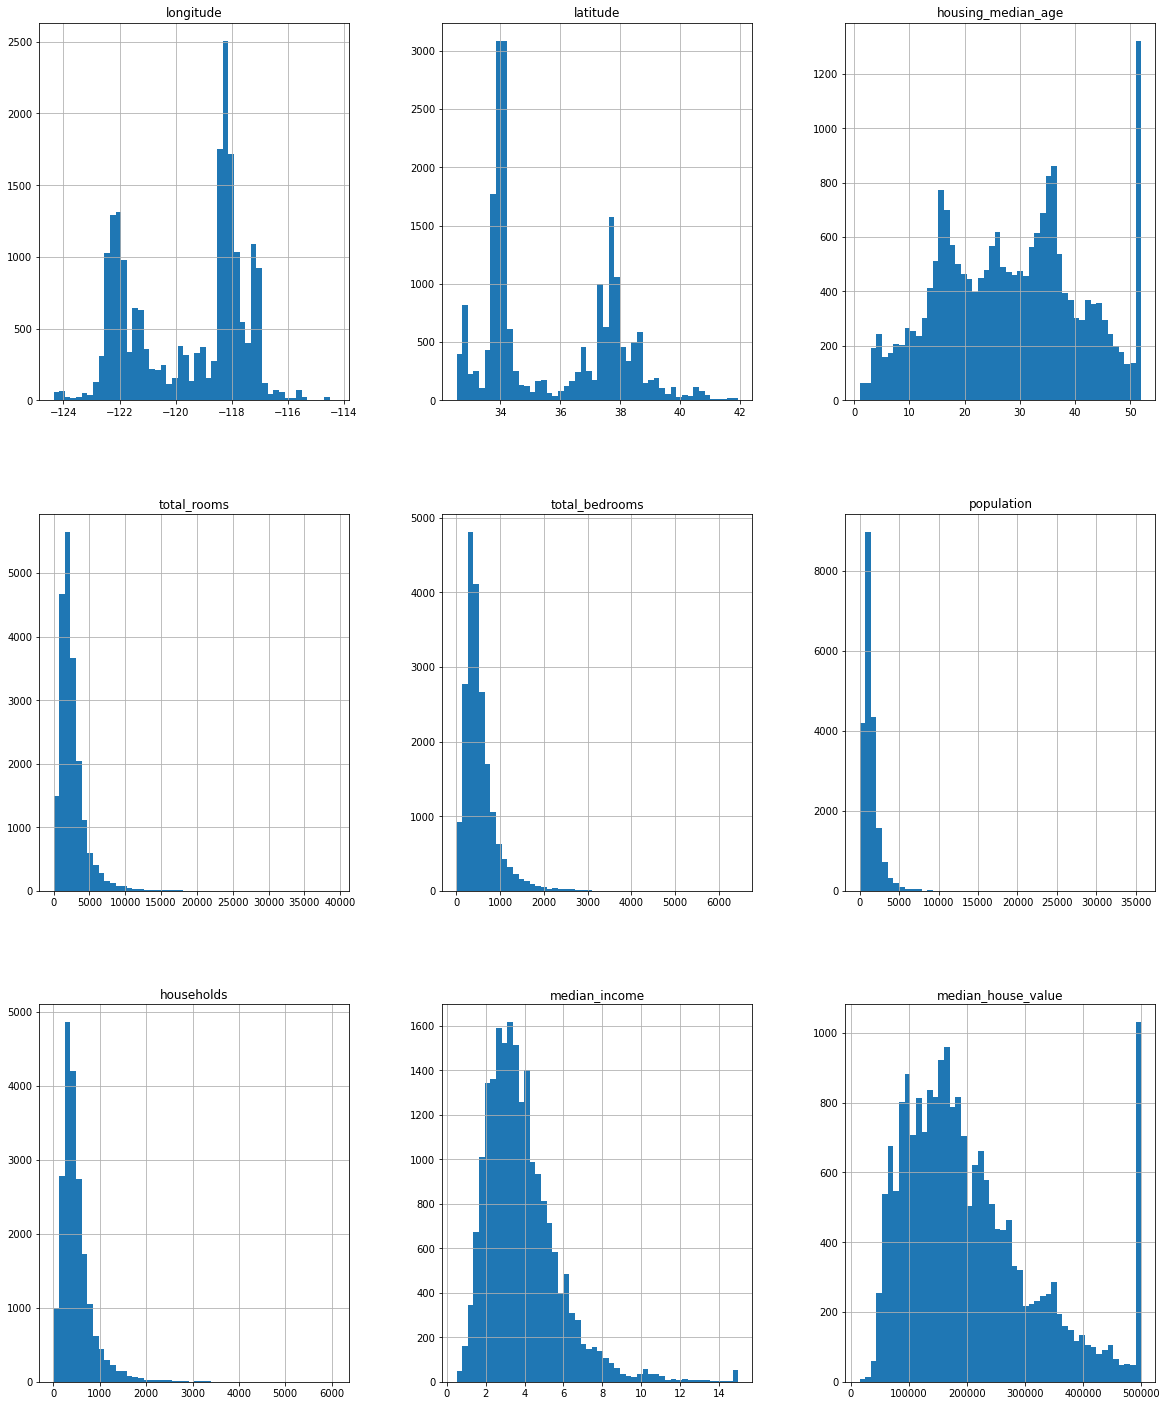

In [8]:
# 7. Show the histogram plot of each attribute.
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,25)) 
plt.show() 

In [13]:
# 8. Show if there are any missing/Null values in the dataset.
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
# 9. Show different types of values in categorical attributes along with their frequencies. 
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
# 10. Fill the missing values with most frequently used value for categorical attribute and for 
# numerical attribute fill median value.
df_num =pd.read_csv(r'/home/ishita/Documents/datasets/housing/housing.csv')
median = df_num["total_bedrooms"].median()
df_num["total_bedrooms"].fillna(median, inplace=True)
mode = df_num["ocean_proximity"].mode()
df_num["ocean_proximity"].fillna(mode, inplace=True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# 11. Display sum of missing values after filling the values.
((df.isnull().sum().sum()) * median)

90045.0

In [15]:
# 12. Transform “median_income” attribute into a new attribute “income_cat” which has 5 levels (1,2,3,4,5) ranging 
#from 0-1.5, 1.5-3.0, 3.0-4.5, 4.5-6.0, 6.0-np.inf respectively. 
# Use pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
import numpy as np
df["income_cat"] = pd.cut(df["median_income"],   
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

In [16]:
# 13. Find the distribution based on “income_cat” in the entire dataset. 
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

<AxesSubplot:>

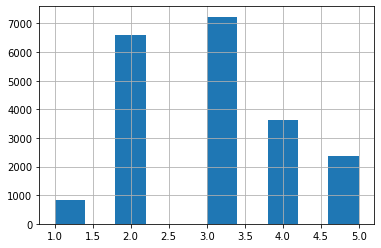

In [17]:
# 14. Plot histogram of “income_cat” attributes. (use df[‘attribute name’].hist() ) 
df["income_cat"].hist()

In [18]:
# 15. Split the dataset 80% of rows for training, and 20% of rows for testing purpose. Just for the sake 
#of learning take first 80% rows as training and, rest 20% rows as testing respectively. Store these 
#train and test datasets in temp_train and temp_test variables.
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]
temp_train, temp_test = split_train_test(df, 0.2)
print(len(temp_train))
print(len(temp_test))

16512
4128


In [19]:
# 16. Check the distribution based on “income_cat” in train and test set that you obtained in above step.
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [20]:
temp_train["income_cat"].value_counts() / len(temp_train)

3    0.349746
2    0.317769
4    0.177386
5    0.115250
1    0.039850
Name: income_cat, dtype: float64

In [21]:
temp_test["income_cat"].value_counts() / len(temp_test)

3    0.353924
2    0.323159
4    0.171996
5    0.111192
1    0.039729
Name: income_cat, dtype: float64

In [22]:
# 17. Reshufle the dataset to have stratified distribution of ‘income_cat’ and then split it into train 
#and test. Use following function 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
 train = df.loc[train_index]
 test = df.loc[test_index]
print(len(train))
print(len(test))

16512
4128


In [23]:
# 18. Check again the distribution based on “income_cat” in train and test set
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
train["income_cat"].value_counts() / len(train)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [25]:
test["income_cat"].value_counts() / len(test)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [26]:
# 19. Find correlation of target attribute with rest of the attributes. Use correlation=df.corr() 
# correlation["attribute name"].sort_values()
correlation=df.corr() 
correlation["median_house_value"].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [27]:
# 20. Convert categorical attribute to numeric using ordinal encoder. Use 
from sklearn.preprocessing import OrdinalEncoder 
oe=OrdinalEncoder () 
df_cat_oe =oe.fit_transform(df[["ocean_proximity"]])
print(df_cat_oe)

[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


In [28]:
# 21. Add the new attribute that you have transformed into numeric into dataset df. 
d = dict(enumerate(df_cat_oe.flatten(), 1))
df["df_cat_oe"]=d.values()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
 11  df_cat_oe           20640 non-null  float64 
dtypes: category(1), float64(10), object(1)
memory usage: 1.8+ MB


In [29]:
# 22. Drop the attribute which has categorical values from the dataset.
df=df.drop("ocean_proximity" , axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   income_cat          20640 non-null  category
 10  df_cat_oe           20640 non-null  float64 
dtypes: category(1), float64(10)
memory usage: 1.6 MB


In [54]:
# 23. Split the dataset. use sklearn.model_selection import train_test_split 
# train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) 
from sklearn.model_selection import train_test_split 
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 
print(len(train_set))
print(len(test_set))


16512
4128


In [56]:
# 24. Separate the target attribute and rest of the attributes from train_set and test_set and store 
# them as train_target, and test_target in two separate variables.
train_target = train_set[target]
train_rest=train_set.drop("median_house_value",axis=1)
test_target = test_set[target]
test_rest = test_set.drop("median_house_value",axis=1)
train_target.info()
print("\n")
test_target.info()

<class 'pandas.core.series.Series'>
Int64Index: 16512 entries, 14196 to 15795
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


<class 'pandas.core.series.Series'>
Int64Index: 4128 entries, 20046 to 3665
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
4128 non-null   float64
dtypes: float64(1)
memory usage: 64.5 KB


In [70]:
# 25. Take a linear regression mode and train it. 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 

In [71]:
# 26. reg.fit(training_dataset_name, training_dataset_target) 
reg.fit(train_set, train_target) 
reg.intercept_
reg.coef_

array([-5.53030717e-11, -5.81505955e-11,  3.94919286e-14,  2.15175100e-14,
       -9.03183778e-14, -7.23726634e-15,  2.01839413e-14, -1.20954654e-11,
        1.00000000e+00,  5.77589516e-13, -9.05660909e-14])

In [73]:
# 27. Predict few values from the dataset. Use predict method and pass some rows from dataset. 
train_set_rand = train_set.sample(frac=0.50)
reg.predict(train_set_rand)

array([184900., 158200., 328500., ..., 262700., 113600., 180100.])